In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 10,6

from statsmodels.tsa.stattools import adfuller
#remove warnings
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

In [2]:
#We use date_parser to read the date column as datetime and not as String

dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m')

In [3]:
pwd

'C:\\Users\\Karan\\Downloads'

In [4]:
import os
os.chdir("C:\\Users\\Karan\\Desktop\\time series\\champagne")

In [5]:
data = pd.read_csv("sales.csv")

In [6]:
data.head()

,Date,Sales
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [7]:
data = pd.read_csv("sales.csv", parse_dates=['Date'], date_parser=dateparse)

In [8]:
data.tail()

,Date,Sales
100,1972-05-01,4618
101,1972-06-01,5312
102,1972-07-01,4298
103,1972-08-01,1413
104,1972-09-01,5877


In [9]:
dataset = data.set_index(['Date'])

In [10]:
dataset.head()

,Sales
Date,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


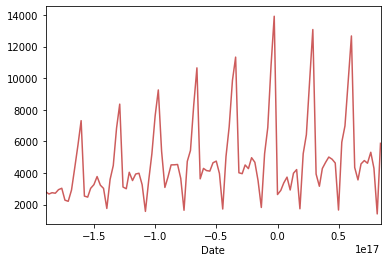

In [11]:

#Plotting the data

sns.tsplot(dataset['Sales'], time = dataset.index,color = "indianred")

In [12]:
#Rolling Statistics
rolling_mean = dataset.rolling(window = 12).mean()
rolling_sd = dataset.rolling(window = 12).std()
print(rolling_mean)

                  Sales
Date                   
1964-01-01          NaN
1964-02-01          NaN
1964-03-01          NaN
1964-04-01          NaN
1964-05-01          NaN
...                 ...
1972-05-01  5709.500000
1972-06-01  5746.000000
1972-07-01  5718.083333
1972-08-01  5697.583333
1972-09-01  5691.416667

[105 rows x 1 columns]


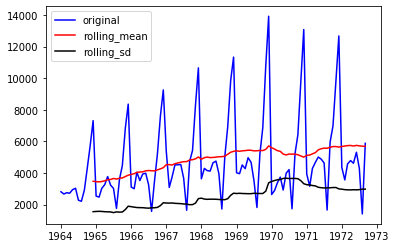

In [13]:
orig= plt.plot(dataset,color = "blue",label = "original")
rmean = plt.plot(rolling_mean,color = "red",label = "rolling_mean")
rsd = plt.plot(rolling_sd,color = "black",label = "rolling_sd")
plt.legend(loc = "best")

In [14]:
dftest = adfuller(dataset['Sales'],autolag = 'AIC')

dfoutput = pd.Series(dftest[0:4], index = ['Test Statistics','p-value','#lags used','No of Observation used'])
for key,value in dftest[4].items():
     dfoutput['Critical Value (%s)'%key] = value

print(dfoutput)

Test Statistics           -1.833593
p-value                    0.363916
#lags used                11.000000
No of Observation used    93.000000
Critical Value (1%)       -3.502705
Critical Value (5%)       -2.893158
Critical Value (10%)      -2.583637
dtype: float64


The p-value is also high (it should be somewhat around 0.05) , critical value should also be more than Test Statistics, therefore we cannot reject null hypothesis and we can say that the data is non-stationary
Therefore we will take the log Scale of the dataset and check whether there is any change in the trend

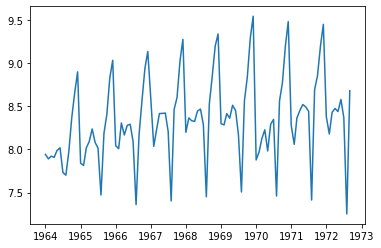

In [15]:
dataset_logScale = np.log(dataset)
plt.plot(dataset_logScale)

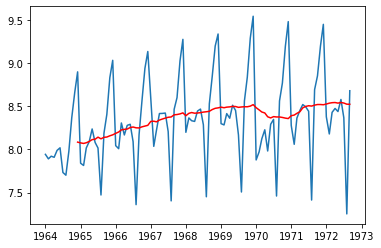

In [16]:
movingAverage = dataset_logScale.rolling(window = 12).mean()
movindSD = dataset_logScale.rolling(window = 12).std()

plt.plot(dataset_logScale)
plt.plot(movingAverage,color = "red")

In [17]:
dataset_logScaleMinusMovingAverage = dataset_logScale - movingAverage
dataset_logScaleMinusMovingAverage.head(10)

#remove Nan Values
dataset_logScaleMinusMovingAverage.dropna(inplace = True)
dataset_logScaleMinusMovingAverage.head(10)

,Sales
Date,
1964-12-01,0.813316
1965-01-01,-0.235109
1965-02-01,-0.255044
1965-03-01,-0.060348
1965-04-01,-0.000889
1965-05-01,0.123526
1965-06-01,-0.037819
1965-07-01,-0.125970
1965-08-01,-0.650031


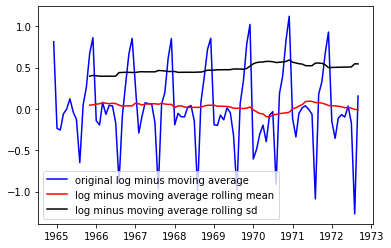

In [18]:

#Performing the rolling Statistics Test
dataset_logScaleMinusMovingAverage_mean = dataset_logScaleMinusMovingAverage.rolling(window =12).mean()
dataset_logScaleMinusMovingAverage_sd = dataset_logScaleMinusMovingAverage.rolling(window = 12).std()


plt.plot(dataset_logScaleMinusMovingAverage,color = "blue", label = "original log minus moving average")
plt.plot(dataset_logScaleMinusMovingAverage_mean,color = "red", label = "log minus moving average rolling mean")
plt.plot(dataset_logScaleMinusMovingAverage_sd,color = "black", label = "log minus moving average rolling sd")
plt.legend(loc = "best")

We can see from the graph that the mean and standard deviation has somewhat become constant, stating that the data is now stationary

In [19]:
#ADFullter test
dftest = adfuller(dataset_logScaleMinusMovingAverage['Sales'],autolag = 'AIC')

dfoutput = pd.Series(dftest[0:4], index = ['Test Statistics','p-value','#lags used','No of Observation used'])
for key,value in dftest[4].items():
     dfoutput['Critical Value (%s)'%key] = value

print(dfoutput)

Test Statistics           -1.750538
p-value                    0.405279
#lags used                12.000000
No of Observation used    81.000000
Critical Value (1%)       -3.513790
Critical Value (5%)       -2.897943
Critical Value (10%)      -2.586191
dtype: float64


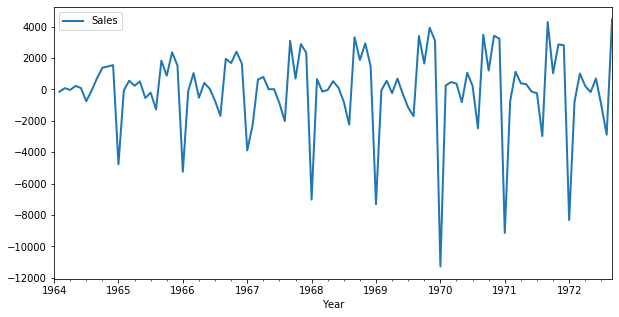

In [20]:
from matplotlib import pyplot
dy = dataset.diff()
dataset.diff().plot(figsize=(10,5), linewidth=2, fontsize=10)
plt.xlabel('Year', fontsize=10);

In [21]:
#ADFullter test
dy = dy.dropna()
dftest = adfuller(dy['Sales'],autolag = 'AIC')

dfoutput = pd.Series(dftest[0:4], index = ['Test Statistics','p-value','#lags used','No of Observation used'])
for key,value in dftest[4].items():
     dfoutput['Critical Value (%s)'%key] = value

print(dfoutput)

Test Statistics          -7.189896e+00
p-value                   2.519620e-10
#lags used                1.100000e+01
No of Observation used    9.200000e+01
Critical Value (1%)      -3.503515e+00
Critical Value (5%)      -2.893508e+00
Critical Value (10%)     -2.583824e+00
dtype: float64


The p-value is high and test-statistics is less than the critical value. Hence, we reject null hypothesis and say our time series is stationary

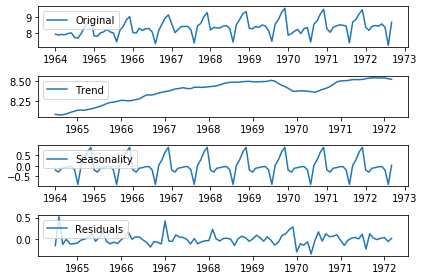

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(dataset_logScale)

trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(dataset_logScale, label = "Original")
plt.legend(loc = "best")

plt.subplot(412)
plt.plot(trend,label = "Trend")
plt.legend(loc = "best")

plt.subplot(413)
plt.plot(seasonality,label = "Seasonality")
plt.legend(loc = "best")


plt.subplot(414)
plt.plot(residual,label = "Residuals")
plt.legend(loc = "best")

plt.tight_layout()

In [23]:
#creating a function for rolling statistics and ADFullter test
def test_Stationarity(timeseries):
    
    
    movingAverageMean = timeseries.rolling(window = 12).mean()
    movingSD = timeseries.rolling(window = 12).std()
    
    orig= plt.plot(timeseries,color = "blue",label = "original")
    rmean = plt.plot(movingAverageMean,color = "red",label = "rolling_mean")
    rsd = plt.plot(movingSD,color = "black",label = "rolling_sd")
    plt.legend(loc = "best")
    
    dftest = adfuller(timeseries['Sales'],autolag = 'AIC')

    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistics','p-value','#lags used','No of Observation used'])
    for key,value in dftest[4].items():
         dfoutput['Critical Value (%s)'%key] = value

    print(dfoutput)

Test Statistics          -6.275488e+00
p-value                   3.910002e-08
#lags used                7.000000e+00
No of Observation used    8.500000e+01
Critical Value (1%)      -3.509736e+00
Critical Value (5%)      -2.896195e+00
Critical Value (10%)     -2.585258e+00
dtype: float64


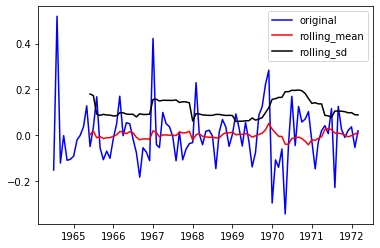

In [24]:

#Testing whether the noise is stationary or not
decomposedLogData = residual
decomposedLogData.dropna(inplace = True)
test_Stationarity(decomposedLogData)

Our noise is non stationary

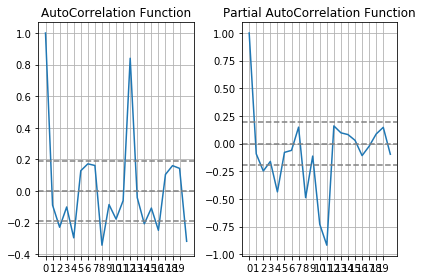

In [25]:
#ACF and PACF to get the value of p and q value

from statsmodels.tsa.stattools import acf,pacf

#ols is ordinary least square
lag_acf = acf(dy,nlags = 20)
lag_pacf = pacf(dy, nlags = 20,method = 'ols')

#Plot ACF

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y = 0,linestyle = '--',color = "gray")
plt.axhline(y = -1.96/np.sqrt(len(dy)),linestyle = '--',color = "gray")
plt.axhline(y = 1.96/np.sqrt(len(dy)),linestyle = '--',color = "gray")
plt.grid()
plt.xticks(np.arange(0,20, 1.0))
plt.title('AutoCorrelation Function')


#plot PACF

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y = 0,linestyle = '--',color = "gray")
plt.axhline(y = -1.96/np.sqrt(len(dy)),linestyle = '--',color = "gray")
plt.axhline(y = 1.96/np.sqrt(len(dy)),linestyle = '--',color = "gray")
plt.title('Partial AutoCorrelation Function')
plt.grid()
plt.xticks(np.arange(0,20, 1.0))
plt.tight_layout()

We can see value of q and p =1 when the graph drops to zero for the first time. The corresponding value of x = 1.

In [41]:
X = dy.values
train = X[0:74] 
test = X[74:]  
predictions = []
#AR model
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar = AR(train)
model_ar_fit = model_ar.fit()
print(test.size)

30


In [42]:
predictions = model_ar_fit.predict(start = 74, end = 104)

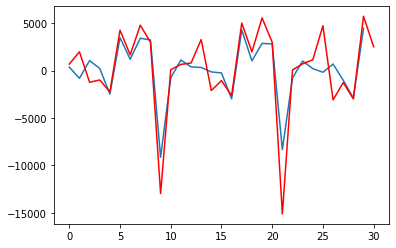

In [43]:

plt.plot(test)
plt.plot(predictions, color = 'red')


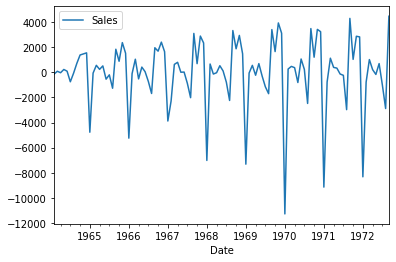

In [44]:
dy.plot()

Moving Average

In [48]:
from statsmodels.tsa.arima_model import ARMA
test_ma = X[73:]
# fit model
model = ARMA(train, order=(0, 2))
model_fit = model.fit()
# make prediction
yhat_ma = model_fit.predict(start = 74, end = 104)
print(yhat_ma)

[ 699.46238191 1972.69904392   37.06420619   37.06420619   37.06420619
   37.06420619   37.06420619   37.06420619   37.06420619   37.06420619
   37.06420619   37.06420619   37.06420619   37.06420619   37.06420619
   37.06420619   37.06420619   37.06420619   37.06420619   37.06420619
   37.06420619   37.06420619   37.06420619   37.06420619   37.06420619
   37.06420619   37.06420619   37.06420619   37.06420619   37.06420619
   37.06420619]


Test MSE: 8942581.831


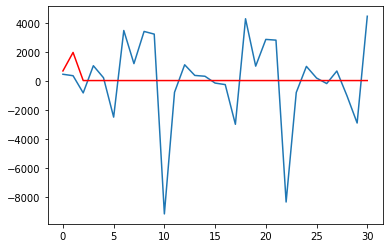

In [49]:
error = mean_squared_error(test_ma, yhat_ma)
print('Test MSE: %.3f' % error)
plt.plot(test_ma)
plt.plot(yhat_ma, color = 'red')

In [50]:


series = pd.read_csv('sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
split_point = len(series) - 12
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 93, Validation 12


In [51]:
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from math import sqrt
 
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]
 
# load data
series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # difference data
    months_in_year = 12
    diff = difference(history, months_in_year)
    # predict
    model = ARIMA(diff, order=(1,1,1))
    model_fit = model.fit(trend='nc', disp=0)
    yhat = model_fit.forecast()[0]
    yhat = inverse_difference(history, yhat, months_in_year)
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
# report performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

>Predicted=8089.831, Expected=8314
>Predicted=9742.831, Expected=10651
>Predicted=5986.917, Expected=3633
>Predicted=3886.972, Expected=4292
>Predicted=4038.160, Expected=4154
>Predicted=4992.344, Expected=4121
>Predicted=5156.557, Expected=4647
>Predicted=5046.670, Expected=4753
>Predicted=4143.810, Expected=3965
>Predicted=2102.963, Expected=1723
>Predicted=5228.315, Expected=5048
>Predicted=5873.367, Expected=6922
>Predicted=8571.352, Expected=9858
>Predicted=11005.986, Expected=11331
>Predicted=4087.458, Expected=4016
>Predicted=4771.838, Expected=3957
>Predicted=4676.128, Expected=4510
>Predicted=4583.383, Expected=4276
>Predicted=5117.348, Expected=4968
>Predicted=5208.147, Expected=4677
>Predicted=4436.431, Expected=3523
>Predicted=2180.882, Expected=1821
>Predicted=5471.251, Expected=5222
>Predicted=7337.577, Expected=6872
>Predicted=10268.338, Expected=10803
>Predicted=11725.394, Expected=13916
>Predicted=4519.494, Expected=2639
>Predicted=4606.047, Expected=2899
>Predicted=49

In [ ]:

# from statsmodels.tsa.arima_model import  ARIMA
# model  = ARIMA(diff, order = (1,0,1))
# results_AR = model.fit(disp = 0)
# plt.plot(dataset_logdiffShifting)
# plt.plot(results_AR.fittedvalues, color = "red")

# #calculated RSS
# plt.title("RSS: %.4f" % sum((results_AR.fittedvalues -dataset_logdiffShifting['Sales'])**2))
# print('Plotting AR Model')